In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
%matplotlib inline

In [59]:
data= pd.read_csv("school.csv")

In [73]:
data.iloc[:,:3].sort_values('Estimate; Total:', ascending=False).head(10)

,Neighborhood,Id,Estimate; Total:
77,Squirrel Hill South,78,15510.0
68,Shadyside,69,13290.0
13,Brookline,14,12777.0
76,Squirrel Hill North,77,11072.0
15,Carrick,16,9825.0
56,North Oakland,57,9565.0
53,Mount Washington,54,8525.0
9,Bloomfield,10,8498.0
7,Beechview,8,7770.0
36,Greenfield,37,7402.0


In [61]:
data1= data[["Neighborhood","Estimate; Enrolled in school: - Enrolled in college, undergraduate years"]]
data1.sort_values('Estimate; Enrolled in school: - Enrolled in college, undergraduate years', ascending=False).head(10)

,Neighborhood,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years"
56,North Oakland,6123.0
19,Central Oakland,4206.0
76,Squirrel Hill North,3916.0
10,Bluff,3376.0
16,Central Business District,1475.0
72,South Side Flats,1394.0
68,Shadyside,1333.0
70,South Oakland,1042.0
83,Terrace Village,1019.0
9,Bloomfield,693.0


In [72]:
data['Enrolled not in college'] = data['Estimate; Total:'] - data['Estimate; Enrolled in school: - Enrolled in college, undergraduate years']
data2= data[["Neighborhood","Enrolled not in college"]]
data2.sort_values('Enrolled not in college', ascending=False).head(10)

,Neighborhood,Enrolled not in college
77,Squirrel Hill South,14900.0
13,Brookline,12221.0
68,Shadyside,11957.0
15,Carrick,9406.0
53,Mount Washington,8060.0
9,Bloomfield,7805.0
7,Beechview,7211.0
76,Squirrel Hill North,7156.0
36,Greenfield,7010.0
12,Brighton Heights,6861.0


<AxesSubplot:>

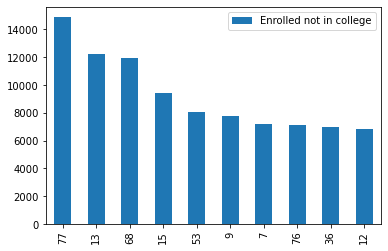

In [78]:
data2.sort_values('Enrolled not in college', ascending=False).head(10).plot.bar()

According to my dataset the best neighborhood in Pittsburgh was Squirrel Hill South. I came to this conclusion by looking over the data for the enrollment numbers of people in the neighborhood excluding the people enrolled in college. I decided to use this specfic metric to define the best neighborhood because education is a very important factor when looking at neighborhoods. The enrollment number of people in the neighborhood excluding people enrolled in college is correlated to the quality and accessibility of education in the neighborhood. Also parents of children not enrolled in college are especially worried about the safety of the neighborhood. If there are a lot of children enrolled in school in a certain neighborhood, it indicates that many families agree on the safety of the neighborhood and the quality of education that their children will recieve.

In [81]:
import pandas
import matplotlib
median_death_dataset = pandas.read_csv("nhoodmedianage20112015.csv")

In [82]:
median_death_dataset.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5


# Clean Data

In [83]:
median_death_dataset = median_death_dataset.dropna(subset = ["TOTAL MD AGE AT DEATH"])
median_death_dataset = median_death_dataset.drop(median_death_dataset.index[0])

In [84]:
median_death_dataset.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
5,WEST END,5.0,76.7,9.0,78.0,14.0,77.5
6,ESPLEN,3.0,NaN,13.0,72.5,16.0,71.7


# Find total mean of data and visualize data

This gives us a baseline median age of death to compare to, and an initial idea of how the data distribution looks.

75.69886363636361

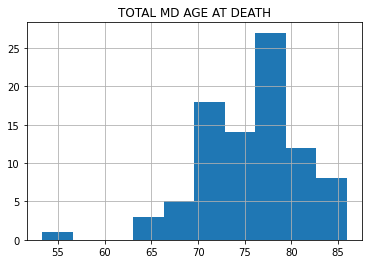

In [85]:
median_death_dataset.hist(column="TOTAL MD AGE AT DEATH")
median_death_dataset["TOTAL MD AGE AT DEATH"].mean()

# Find 10 neighborhoods with highest median life expectancy

In [86]:
median_death_dataset = median_death_dataset.sort_values("TOTAL MD AGE AT DEATH")
median_death_dataset.tail(10)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
83,SHADYSIDE,72.0,81.2,320.0,82.4,406.0,82.1
77,OVERBROOK,4.0,NaN,284.0,82.5,289.0,82.2
27,SWISSHELM PARK,0.0,0.0,67.0,83.1,67.0,83.1
28,NEW HOMESTEAD,4.0,NaN,67.0,83.8,71.0,83.4
20,CENTRAL OAKLAND,2.0,NaN,50.0,84.0,52.0,84.0
68,SQUIRREL HILL NORTH,6.0,75.0,231.0,85.3,242.0,85.0
53,POINT BREEZE,13.0,66.7,158.0,85.7,175.0,85.1
71,BANKSVILLE,4.0,NaN,247.0,85.5,253.0,85.5
76,NORTH OAKLAND,45.0,70.9,227.0,86.8,279.0,85.6
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9


Median age at death is an important factor is determining the best neighborhood in Pittsburgh. In can tell one about different factors such as poor air quality causing a downturn in median age at death, or violent deaths or prevalence of disease in a neighborhood. Beyond those details, most people would agree that it is better to live longer than to die earlier. That is why this dataset is a useful metric for determining the best neighborhood in Pittsburgh.

As seen from our sorted data, the top 10 neighborhoods in Pittsburgh based on median age at death are:

In [87]:
median_death_dataset.iloc[::-1].head(10)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9
76,NORTH OAKLAND,45.0,70.9,227.0,86.8,279.0,85.6
71,BANKSVILLE,4.0,NaN,247.0,85.5,253.0,85.5
53,POINT BREEZE,13.0,66.7,158.0,85.7,175.0,85.1
68,SQUIRREL HILL NORTH,6.0,75.0,231.0,85.3,242.0,85.0
20,CENTRAL OAKLAND,2.0,NaN,50.0,84.0,52.0,84.0
28,NEW HOMESTEAD,4.0,NaN,67.0,83.8,71.0,83.4
27,SWISSHELM PARK,0.0,0.0,67.0,83.1,67.0,83.1
77,OVERBROOK,4.0,NaN,284.0,82.5,289.0,82.2
83,SHADYSIDE,72.0,81.2,320.0,82.4,406.0,82.1


The metric of median age at death therefore concludes that Squirrel Hill South in the best neighborhood in Pittsburgh with a median age at death of 85.9 years. Well above the county mean.

In [3]:
illegal_dumping = pd.read_csv("illegaldumpsites.csv", 
                                       index_col="site_name") # use the column named _id as the row index
illegal_dumping.iloc[0:5]

,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
site_name,,,,,,,,
St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


This code will remove all of the irrelevant columns from the dataframe. Additionally, it will take all of the blank values in the estimated tons column (inputed as NaN by pandas) and set them to .2 tons. A blank spot likely indicates that the amount of garbage was smaller. That is why .2 tons was selected (it is a lower estimate). 

In [4]:
dumping_rate = illegal_dumping.drop(["City", "location_description", "latitude", "longitude", "Unnamed: 8", "Status"], axis = 1)
dumping_rate.fillna(.2)
dumping_rate = dumping_rate.set_index('Neighborhood')
dumping_rate.iloc[0:5]

,estimated_tons
Neighborhood,
Allentown,0.5
Allentown,3
Allentown,1
Allentown,0.5
Allentown,0.1


This will find the average amount of garbage per dump. It is important to note that there is one major outlier (a value of 999 tons) which was included in the first average, but not the second.

In [5]:
#get data from estimated_tons and convert all empty cells and strings to 0
#examples of strings are "undetermined" and "unapplicable"
sum = 0
for index, row in illegal_dumping.iterrows():
    try:
        k = float(row[3])           
        if(math.isnan(k)):
            row[3] = 0
        else:
            sum += k
    except:
        row[3] = 0
average = sum/len(illegal_dumping.index)
print("average amount of tons per dump is " + str(average))
average_no_outlier = (sum-999)/(len(illegal_dumping.index)-1)
print("average amount of tons per dump without the outlier is " + str(average_no_outlier))

average amount of tons per dump is 2.902262443438915
average amount of tons per dump without the outlier is 1.7741789354473396


This code creates a dictionary which adds up all of the dumping for each neighborhood. At the end the dictionary is converted back into a pandas dataframe for further evaluation. The top 10 neighborhoods are printed from the dataframe.

In [16]:
neighborhoods = {}
for index, row in illegal_dumping.iterrows():
    name = row[2]
    if not(name == 'To Be Determined'):
        k = 0.2
        try:
            k = float(row[3])
        except: pass
        if math.isnan(k):
            k = 0
        if name in neighborhoods: 
            neighborhoods[name] += k
        else:
            neighborhoods[name] = k
dumpPerHood = pd.DataFrame.from_dict(neighborhoods, orient='index')
dumpPerHood.columns = ['total_dumping']
averageDump = int(dumpPerHood.mean())
print("The average amount of Dumping per neighborhood is " + str(averageDump) + " tons")
dumpPerHood.sort_values(by=['total_dumping'], ascending=True).head(10)

The average amount of Dumping per neighborhood is 16 tons


,total_dumping
East Liberty,0.0
Freeport,0.0
Gibsonia,0.0
Sewickley,0.0
Harmarville,0.0
Natrona,0.0
North Park,0.2
O'Hara,0.3
Buena Vista,0.3
Point Breeze North,0.3


Top 30 Neighborhoods represented by a Pandas bar graph.

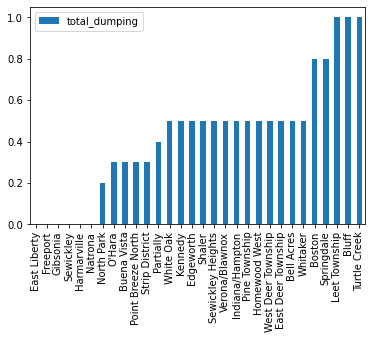

In [40]:
lowest_garbage=dumpPerHood.sort_values(by=['total_dumping'], ascending=True).head(30)
lowest_garbage.plot.bar()

Based off the results of my data set, I found that there were multiple neighborhoods that had no illegal dumping. These included East Liberty, Freeport, Gibsonia, Sewickley, Harmarville, and Natrona. Any of these neighborhoods would be the best option if only considering the amount of illegal dumping. The average per neighborhood was slightly more than 16 tons, so any of these neighborhoods under 5 tons are also a very good options, being well ahead of the curve. Illegal dumping is a very important factor when selecting a neighborhood to live in because illegal dumping can have negative health effects. A large amount of dumping indicates a messy and unhealthy neighborhood. Additionally it reflects that a neighborhood is less likely to enforce health standards in general. Finding a place that is both clean and healthy to live in is very important, and thats why it is very important to consider illegal dumping and it's greater consequences and implications.